# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
[Klasifikasi] pada [Product Classification and Clustering] menggunakan [Naive Bayes]]

<b>Kelompok: 8 </b>

Anggota:
1. Efhram Lazuardi Vidya Agus - 1301220346
2. Audrey Nasywaa Harimaydina - 1301220347


#### Pendahuluan
Setiap kelompok harus memilih salah satu dataset. Dataset yang kami pilih berjudul “Product Classification and Clustering”. Terdapat informasi mengenai dataset pada link dibawah ini.

https://archive.ics.uci.edu/dataset/837/product+classification+and+clustering

Dataset ini berisi informasi tentang produk yang mungkin termasuk atribut seperti ID Produk, Judul Produk, ID Merchant, ID Kluster, Label Kluster, ID Kategori, dan Label Kategori. Dataset ini dapat digunakan untuk tugas klasifikasi produk dan klastering. Tujuan utama dari klasifikasi produk adalah mengkategorikan produk-produk ke dalam kategori atau kelas yang telah ditentukan sebelumnya. Tujuan klastering produk adalah mengelompokkan produk-produk yang memiliki karakteristik serupa ke dalam kelompok atau klaster.
Kami, membagi data train dan test dengan cara mengimport test_spilt.


In [1]:
#Import Dataset

import pandas as pd
data=pd.read_csv("pricerunner_aggregate.csv")

In [2]:
#Menampilkan Data

data.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


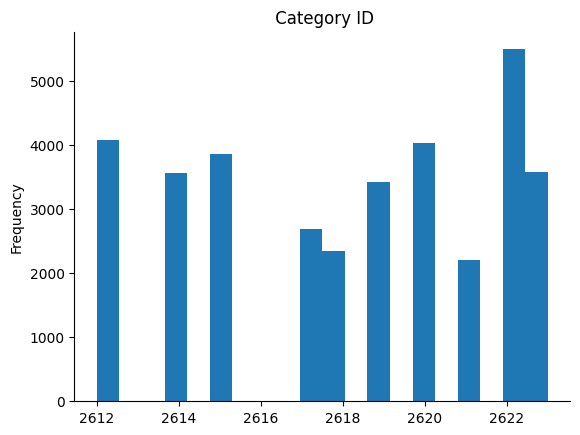

In [3]:
#Ploting Berdasarkan Category ID

from matplotlib import pyplot as plt
data[' Category ID'].plot(kind='hist', bins=20, title=' Category ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

Berdasarkan histogram diatas,
sumbu X untuk menunjukkan nilai kategori ID
sumbu Y untuk menunjukkan frekuensi kemunculan kategori ID
salah satu contohnya, pada kategori ID 2616 paling sedikit produknya.

In [4]:
#Deskripsi Data

data.describe()

,Product ID,Merchant ID,Cluster ID,Category ID
count,35311.000000,35311.000000,35311.000000,35311.000000
mean,26150.800176,120.501883,30110.687633,2618.142930
std,13498.191220,117.045557,18410.265642,3.600708
min,1.000000,1.000000,1.000000,2612.000000
25%,14958.500000,17.000000,6123.000000,2615.000000
50%,27614.000000,75.000000,40630.000000,2619.000000
75%,37508.500000,253.000000,44059.000000,2622.000000
max,47358.000000,371.000000,47525.000000,2623.000000


code ini berfungsi untuk mendeskripsikan dataset tersebut, terdapat jumlah data, rata rata, standar deviasa(ukuran penyebaran data), nilai minimum, quartil 1, median, quartil 3 dan nilai maximum.

In [5]:
#Info Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


<Figure size 2000x1200 with 0 Axes>

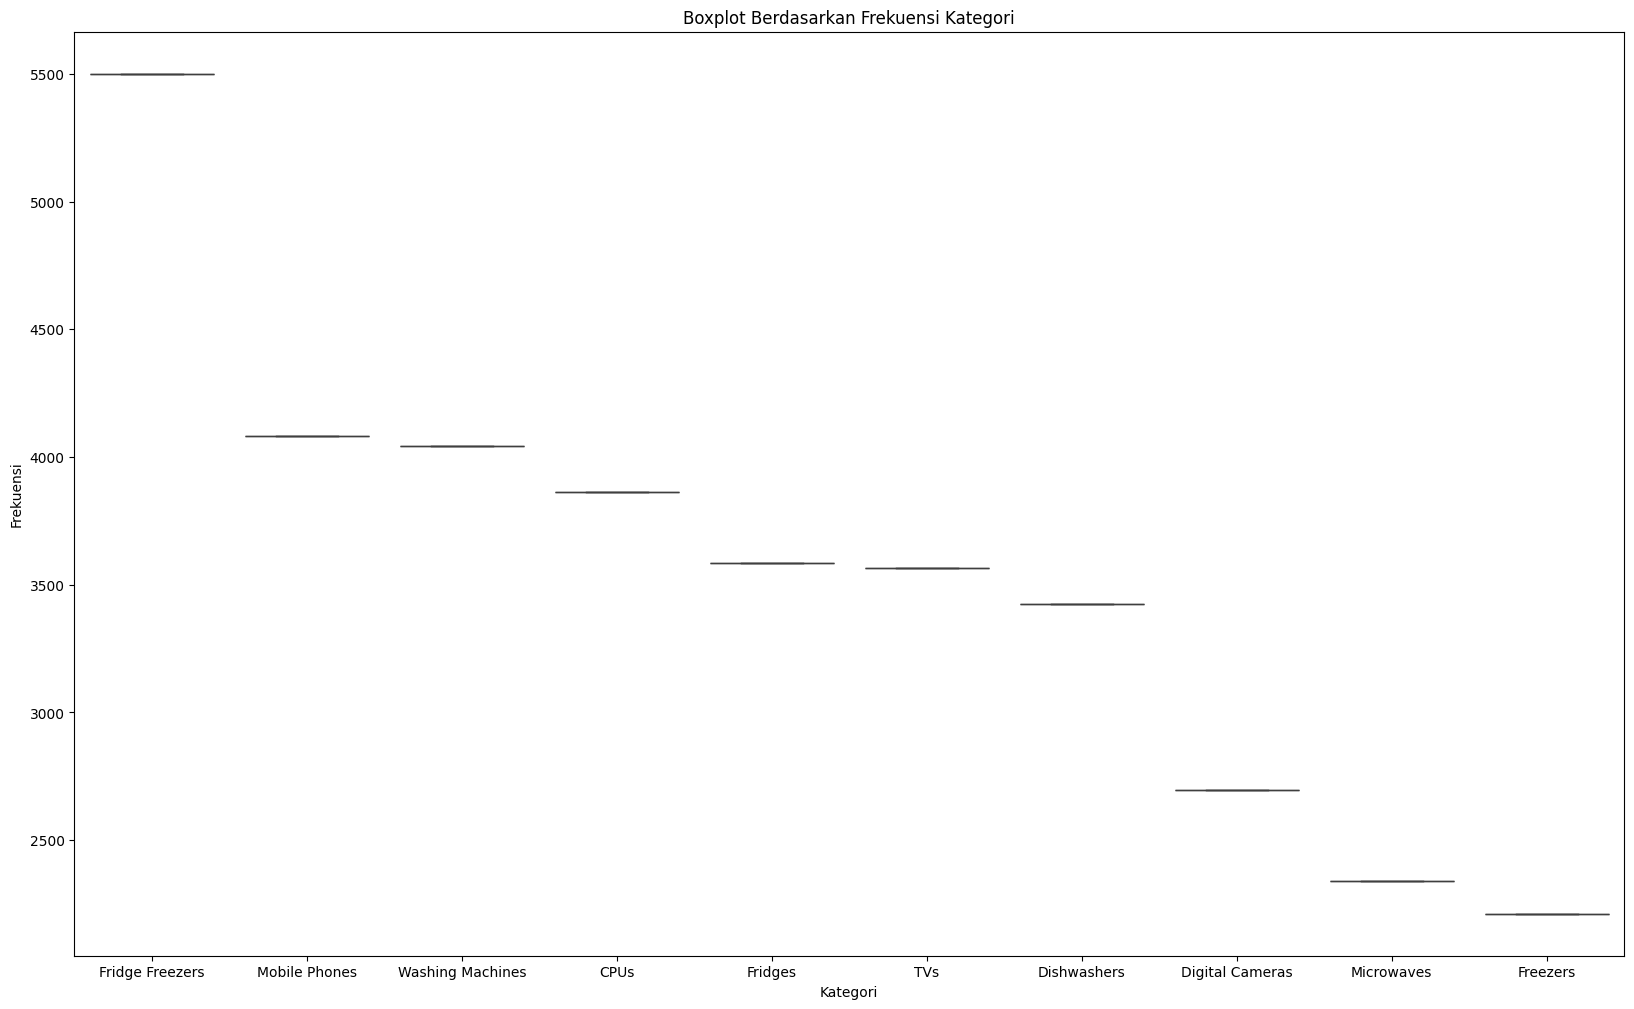

In [10]:
#Boxplot

import seaborn as sns
plt.figure(figsize=(20, 12))

# Membuat boxplot menggunakan seaborn
frequency = data[' Category Label'].value_counts().reset_index()
frequency.columns = ['Category', 'Frequency']

# Membuat figure dan axis
plt.figure(figsize=(20, 12))

# Membuat boxplot menggunakan seaborn
sns.boxplot(x='Category', y='Frequency', data=frequency)

# Menambahkan judul dan label
plt.title('Boxplot Berdasarkan Frekuensi Kategori')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

Boxplot diatas berdasarkan kategori dan frekuensi
Boxplot diatas menunjukkan banyak sebaran datanya.

#### Metode Naive Bayes
Kami menggunakan metode Naive Bayes, yaitu salah satu algoritma pembelajaran induktif yang paling efektif dan efesien untuk machine learning. Metode pengklasifikasiannya berdasarkan probabilitas sederhana dan dirancang agar dapat dipergunakan dengan variable penjelas saling bebas(independen).
Tipe Algoritma yang kami gunakan yaitu Gaussian Naive Bayes. Asumsi pendistribusian nilai kontinu yang terkait dengan setiap fitur berisi nilai numerik.

In [11]:
df=data
X=df[['Product ID',' Merchant ID', ' Cluster ID']]
y=df[' Category ID']

datanya berdasarkan X yaitu product ID, Merchant ID dan Cluster ID yang akan dicari (tujuan) yaitu Y = kategori ID

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=109)
print("Train: ",X_train.shape,y_train.shape,"Test: ",(X_test.shape,y_test.shape))

Train:  (28248, 3) (28248,) Test:  ((7063, 3), (7063,))


code tersebut fungsinya untuk membagi data train dan data testing
Dari percobaan ini, kita mendapatkan 80% sebagai data traing dan 20% sebagai data testing

data train yang didapatkan adalah 28248 dan data testing yang didapatkan adalah 7063

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

Code tersebut untuk mengimport model Gaussian Naive
setelah di inisialisasikan (gnb), lalu akan diimplementasikan.
gnb.fit(X_train, y_Train) sebagai pembelajarannya(learning) dan ketika sudah didapatkan, akan menejalakan predict(X_test) yaitu testing.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix Naive Bayes")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
acu_nb=accuracy_score(y_test,y_pred)
print('AKURASI NB: %.3f' % acu_nb)

Confusion Matrix Naive Bayes
[[ 829    0    0    0    0    0    0    0    0    0]
 [   0  680   31    0    0    0    0    0    0    0]
 [   0    6  767    0    0    0    0    0    0    0]
 [   0    0    0  529   29    0    0    0    0    0]
 [   0    0    0    0  439   21    0    0    0    0]
 [   0    0    0    0    0  666   34    0    0    0]
 [   0    0    0    0    0    0  738   36    0    0]
 [   0    0    0    0    0    0    0  389   17    0]
 [   0    0    0    0    0    0    0    0 1081   38]
 [   0    0    0    0    0    0    0    0    0  733]]
              precision    recall  f1-score   support

        2612       1.00      1.00      1.00       829
        2614       0.99      0.96      0.97       711
        2615       0.96      0.99      0.98       773
        2617       1.00      0.95      0.97       558
        2618       0.94      0.95      0.95       460
        2619       0.97      0.95      0.96       700
        2620       0.96      0.95      0.95       774
       

#### Hasil dan Analisis

Dari analisis yang telah dilakukan, didapatkan hasil bahwa akurasi dengan metode Naive Bayes ini 97% mampu memprediksi dengan benar.

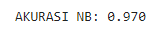

#### Kesimpulan


Kesimpulan dari analisis ini, dengan menggunakan metode Naive Bayes pada machine learning menggunakan dataset product clustering and classification dapat memprediksi dengan benar sebanyak 97% tingkat akurasinya.